In [1]:
# Welly: https://code.agilescientific.com/welly/
import welly

In [13]:
#Read the LAS files
project = welly.read_las("../../Data/LAS/*.LAS")

Loading wells: 100%|██████████| 8/8 [00:03<00:00,  2.40it/s]


In [3]:
# For each log inside each well, figure out the unique curve name and alias them.
unique_well_logs = set()
for well in project:
    unique_well_logs.update(well.data.keys())
unique_well_logs

{'ATRT',
 'ATRX',
 'BATC',
 'CAL1',
 'DCAV',
 'DTC',
 'DTCO',
 'DTS',
 'DTSM',
 'ECGR',
 'GR',
 'GRARC',
 'GRD',
 'HDAR',
 'HROM',
 'HTNP',
 'NPHI',
 'P16H',
 'P34H',
 'RD',
 'RHOB',
 'RHOZ',
 'RS',
 'TNP',
 'TNPH'}

In [4]:
#Alias the curve names
alias = {
    "Gamma": ["GR", "GRARC", "GRD"],
    "Density": ["RHOZ", "RHOB", "DEN", "RHOZ"],
    "Sonic": ["DT", "DTC", "DTCO", "DTSM"],
    "Caliper": ["CAL", "CALI", "CALS", "CAL1", "HDAR"],
    "Porosity SS": ['NPSS', 'DPSS'],
    "Resistivity": ["RS","RD"],
    "Neutron Porosity": ["NPHI","TNPH","TNP"]
}

In [5]:
#Get one well
well = project[0]

In [6]:
#Create Pandas DataFrame
well.df()

,GR,RS,RD,DTCO,DTSM,HDAR,RHOB,NPHI
DEPT,,,,,,,,
489.5,16.2084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490.0,20.6540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490.5,19.2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491.0,15.8395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491.5,14.7239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5247.5,NaN,7.8354,7.3690,NaN,NaN,NaN,NaN,NaN
5248.0,NaN,10.0486,8.9576,NaN,NaN,NaN,NaN,NaN
5248.5,NaN,15.5897,8.7275,NaN,NaN,NaN,NaN,NaN


In [7]:
#Use the curve name aliases
well.df(keys=[alias.keys()], alias=alias)

,Gamma,Density,Sonic,Caliper,Resistivity,Neutron Porosity
DEPT,,,,,,
489.5,16.2084,NaN,NaN,NaN,NaN,NaN
490.0,20.6540,NaN,NaN,NaN,NaN,NaN
490.5,19.2559,NaN,NaN,NaN,NaN,NaN
491.0,15.8395,NaN,NaN,NaN,NaN,NaN
491.5,14.7239,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5247.5,NaN,NaN,NaN,NaN,7.8354,NaN
5248.0,NaN,NaN,NaN,NaN,10.0486,NaN
5248.5,NaN,NaN,NaN,NaN,15.5897,NaN


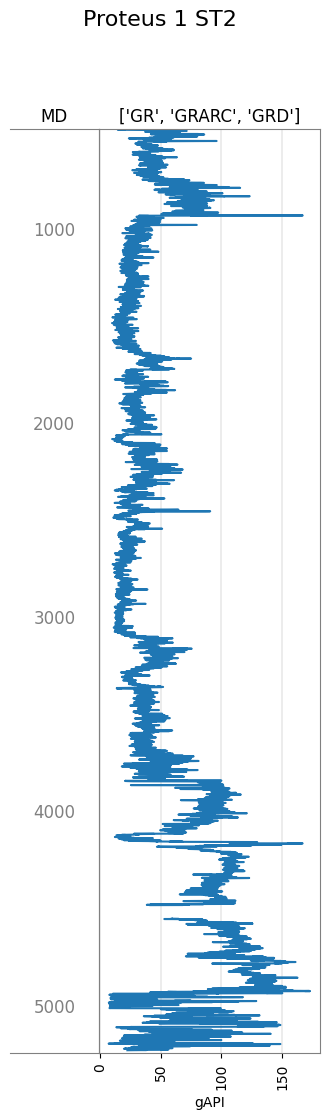

In [ ]:
#Plot some curves using the aliased curves
well.plot(tracks = ['MD',alias.get('Gamma')])

In [9]:
#Check curve quality from a single well
import welly.quality as q

tests = {
    'Each': [
        q.no_flat,
        q.no_monotonic,
        q.no_gaps,
    ],
    'Gamma': [
        q.all_positive,
        q.all_below(450),
        q.check_units(['API', 'GAPI']),
    ],
    'DT': [
        q.all_positive,
    ],
    'Sonic': [
        q.all_between(1, 10000),  # 1333 to 5000 m/s
        q.no_spikes(10),          # 10 spikes allowed
    ],
}

In [11]:
passed = well.qc_data(tests, alias=alias)
passed

{'GR': {'no_flat': np.True_,
  'no_monotonic': np.True_,
  'no_gaps': False,
  'all_positive': True,
  'all_below': True,
  'check_units': False},
 'RS': {'no_flat': np.True_, 'no_monotonic': np.True_, 'no_gaps': False},
 'RD': {'no_flat': np.True_, 'no_monotonic': np.True_, 'no_gaps': False},
 'DTCO': {'no_flat': np.True_,
  'no_monotonic': np.True_,
  'no_gaps': False,
  'all_between': True,
  'no_spikes': np.False_},
 'DTSM': {'no_flat': np.True_,
  'no_monotonic': np.True_,
  'no_gaps': False,
  'all_between': True,
  'no_spikes': np.False_},
 'HDAR': {'no_flat': np.True_, 'no_monotonic': np.True_, 'no_gaps': True},
 'RHOB': {'no_flat': np.True_, 'no_monotonic': np.True_, 'no_gaps': True},
 'NPHI': {'no_flat': np.True_, 'no_monotonic': np.True_, 'no_gaps': True}}

In [12]:
#View the well QC results as HTML
from IPython.display import HTML

html = well.qc_table_html(tests, alias=alias)
HTML(html)

Curve,Passed,Score,all_positive,no_flat,check_units,no_spikes,all_between,no_monotonic,all_below,no_gaps
GR,4 / 6,0.667,True,True,False,,,True,True,False
RS,2 / 3,0.667,,True,,,,True,,False
RD,2 / 3,0.667,,True,,,,True,,False
DTCO,3 / 5,0.600,,True,,False,True,True,,False
DTSM,3 / 5,0.600,,True,,False,True,True,,False
HDAR,3 / 3,1.000,,True,,,,True,,True
RHOB,3 / 3,1.000,,True,,,,True,,True
NPHI,3 / 3,1.000,,True,,,,True,,True


In [22]:
import numpy as np
import pandas as pd
from welly import Well

In [23]:
#Get all of the wells
Boreas = Well.from_las("../../Data/LAS/Boreas1Decim.LAS")
Kronos = Well.from_las("../../Data/LAS/Kronos1Decim.LAS")
Pharos = Well.from_las("../../Data/LAS/Pharos1Decim.LAS")
Poseidon1 = Well.from_las("../../Data/LAS/Poseidon1Decim.LAS")
Poseidon2 = Well.from_las("../../Data/LAS/Poseidon2Decim.LAS")
PoseidonNorth = Well.from_las("../../Data/LAS/PoseidonNorth1Decim.LAS")
Proteus = Well.from_las("../../Data/LAS/Proteus1Decim.LAS")
Torosa = Well.from_las("../../Data/LAS/Torosa1Decim.LAS")

In [26]:
#Attache deviation surveys to the wells
BoreasSurvey = pd.read_csv('../../Data/Deviation Surveys/Boreas 1.deviation', sep=r"\s+", names=["MD", "INCL", "AZI"])

ParserError: Error tokenizing data. C error: Expected 5 fields in line 3, saw 6
